<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/20210119_python_4_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
mall_df = pd.read_csv("/content/drive/MyDrive/Data_Set/Iris/Mall_Customers.csv", sep=",", encoding="ISO-8859-1", header=0)
mall_df.head(100)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


In [3]:
#Check Null Values
mall_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
#Inspect the DataFrame
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


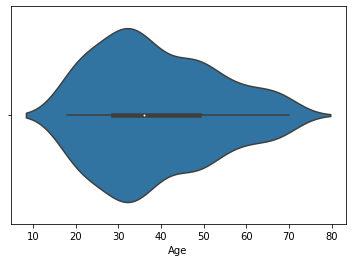

In [7]:
sns.violinplot(mall_df['Age']);

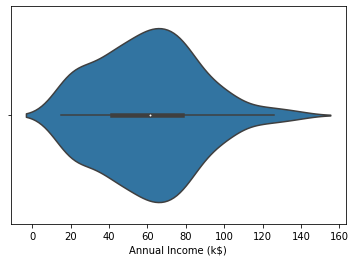

In [8]:
sns.violinplot(mall_df['Annual Income (k$)']);

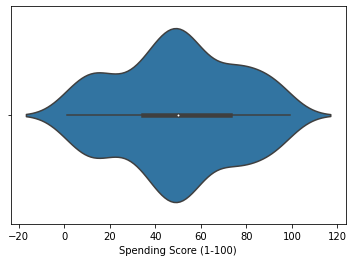

In [9]:
sns.violinplot(mall_df['Spending Score (1-100)'])
plt.show()

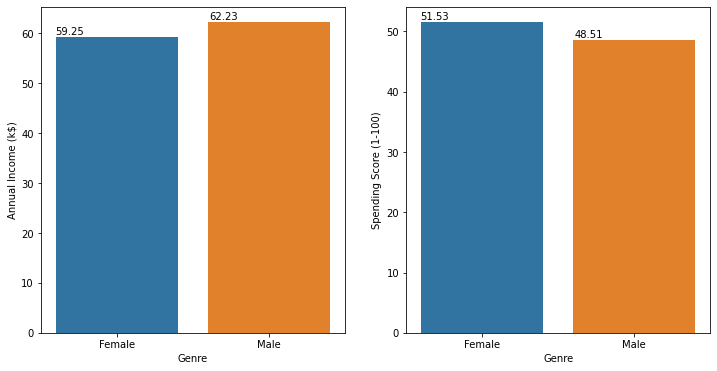

In [12]:
#BIvariate Analysis
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
cluster_type = mall_df.groupby(['Genre'])['Annual Income (k$)'].mean().reset_index()
ax=sns.barplot(x = 'Genre', y='Annual Income (k$)', data=cluster_type)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.subplot(1,2,2)
cluster_type = mall_df.groupby(['Genre'])['Spending Score (1-100)'].mean().reset_index()
ax=sns.barplot(x = 'Genre', y='Spending Score (1-100)', data=cluster_type)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

In [13]:
#Binning the Age of the Customers
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
slot = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70+']

mall_df['Age_Range']=pd.cut(mall_df['Age'],bins,labels=slot)

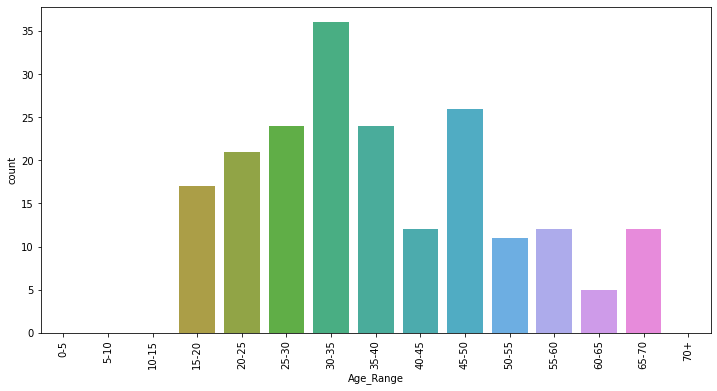

In [14]:
#Which age People mostly visit the Mall?
plt.figure(figsize=(12,6))
edu=sns.countplot(x="Age_Range", data=mall_df)
edu.set_xticklabels(edu.get_xticklabels(),rotation=90)
plt.show()

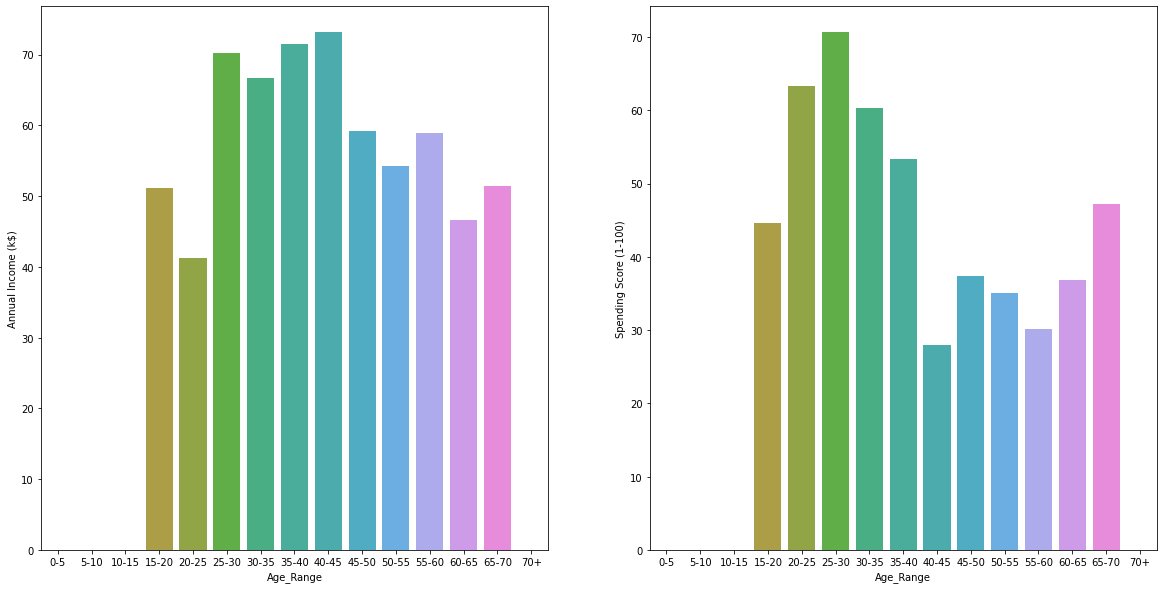

In [15]:
#BIvariate Analysis
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
cluster_type = mall_df.groupby(['Age_Range'])['Annual Income (k$)'].mean().reset_index()
sns.barplot(x = 'Age_Range', y='Annual Income (k$)', data=cluster_type)
plt.subplot(1,2,2)
cluster_type = mall_df.groupby(['Age_Range'])['Spending Score (1-100)'].mean().reset_index()
sns.barplot(x = 'Age_Range', y='Spending Score (1-100)', data=cluster_type)
plt.show()

As we can observe, 

1.   Age between 25-45 has more anuual income
2.   25-30 Age People has more spending score

In [16]:
mall_df.drop('Age_Range',axis=1,inplace=True)
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Hopkin Score

In [17]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
hopkins(mall_df.drop(['CustomerID','Genre'],axis=1))

0.7459241535373485

In [20]:
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Scaling the Data

In [22]:
mall_df_data=mall_df.drop(['CustomerID','Genre','Age'],axis=1)
# instantiate
scaler = MinMaxScaler()

# fit_transform
mall_df_scaled = scaler.fit_transform(mall_df_data)
mall_df_scaled.shape

(200, 2)

In [23]:
#Converting the scaled data to data frame
mall_df_scaled = pd.DataFrame(mall_df_scaled)
mall_df_scaled.columns = mall_df_data.columns
mall_df_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


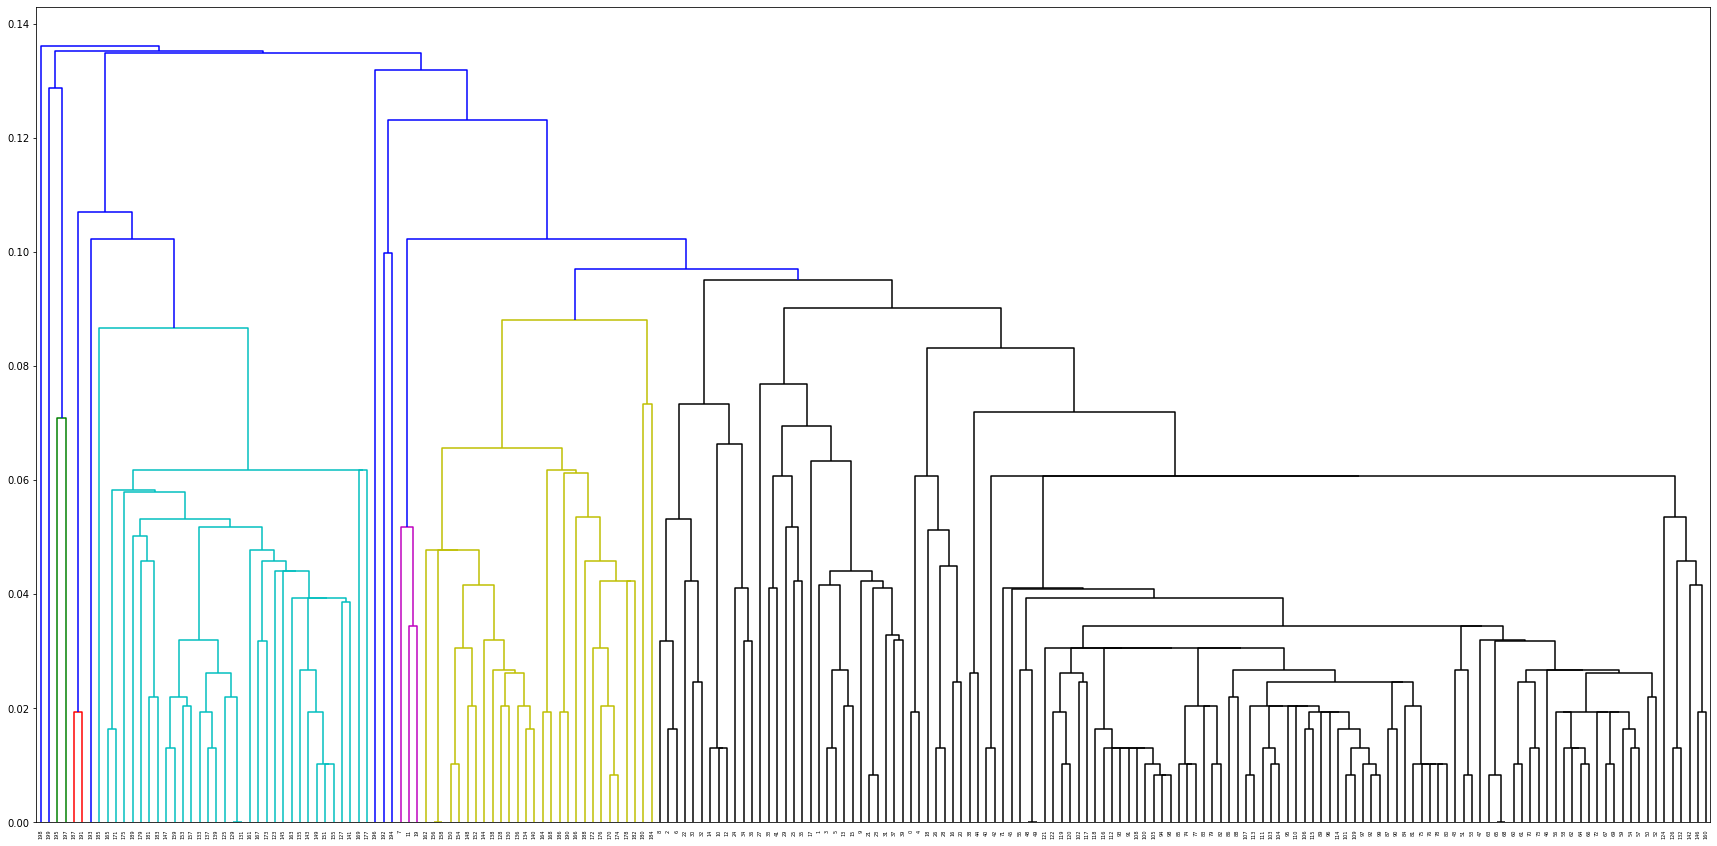

In [24]:
#Hierarchial Clustering
# single linkage
plt.figure(figsize=(30,15))
mergings = linkage(mall_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

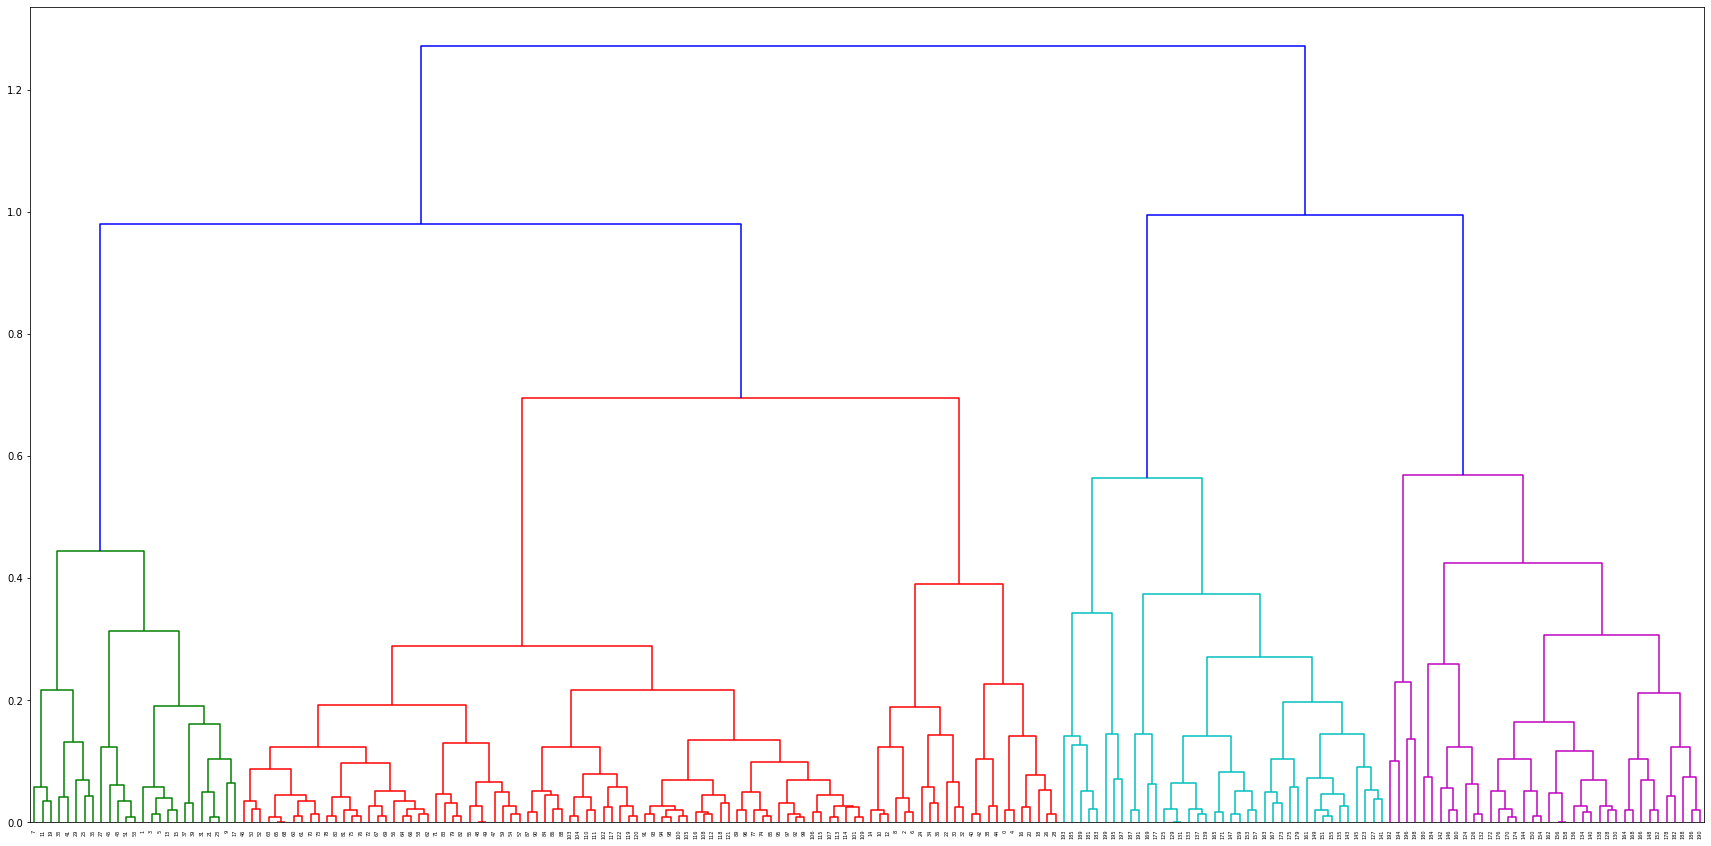

In [25]:
# complete linkage
plt.figure(figsize=(30,15))
mergings = linkage(mall_df_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [26]:
# 4 clusters
cluster_l = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_l

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [27]:
# assign cluster labels
mall_df['cluster_id'] = cluster_l
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


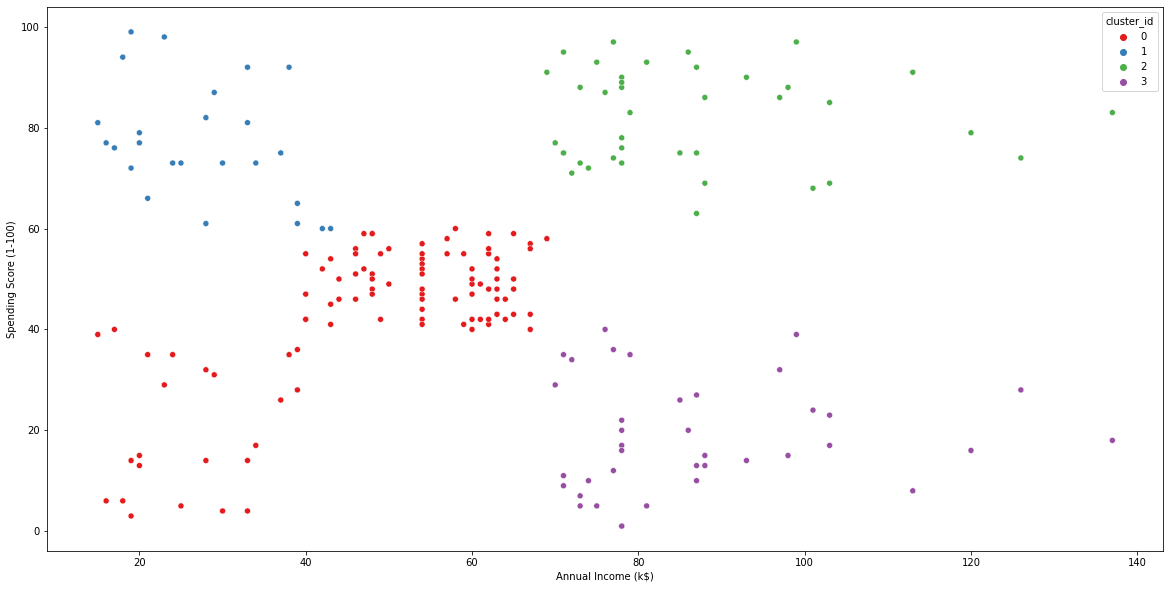

In [28]:
plt.figure(figsize=(20,10))

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster_id', data = mall_df, palette = 'Set1');

In [29]:
mall_df['cluster_id'].value_counts()

0    98
2    39
3    38
1    25
Name: cluster_id, dtype: int64

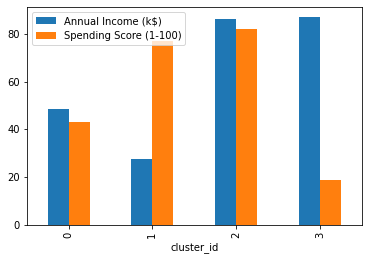

In [31]:
#Profiling the clusters
mall_df.drop(['CustomerID','Age','Genre'],axis=1).groupby('cluster_id').mean().plot(kind='bar')
plt.show()

Cluster_id 2 are the best customers to the Mall they have high Annual income and they will have spending score, so we shouldn't loose these customers as they contribute a lot to mall income
Cluster _id 3 have more income but they spend less so we can target these customers with some offers, so they might tend to buy and increase their spending score,when we want market for some new products or with some special offers this cluster customers will be best
Cluser_id 0 are the intermediate level customers they have considerable spending score but their spending score can also be increased ,so we can go to them with some better offers and good products for marketing

cluster_id 1 are the customers where the income is low but they spend very good so these customers are sop good to our Mall

DB SCAN Clustering
To avoid noise in the clusters we use DB SCAN clustering
We can identify the clusters surreounded by another cluster in the DBSCAN clustering
NO prefedined clusters defined

In [32]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [33]:
model=DBSCAN(eps=0.1,min_samples=10).fit(mall_df_scaled)
print(model.labels_)

[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  0
 -1  0 -1  1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  2  1  2  1  2  3  2  3  2  1  2  3  2  3  2  3  2  3  2  1  2
  3  2  1  2  3  2  3  2  3  2  3  2  3  2  3  2  1  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3  2  3  2 -1  2  3  2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [34]:
# assign cluster labels
mall_df['cluster_lab'] = model.labels_
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
0,1,Male,19,15,39,0,-1
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,0,-1
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,0,-1


In [35]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda : colors[x % len(colors)])

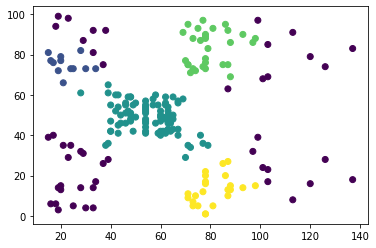

In [36]:
plt.scatter(mall_df['Annual Income (k$)'], mall_df['Spending Score (1-100)'], c=mall_df['cluster_lab']);

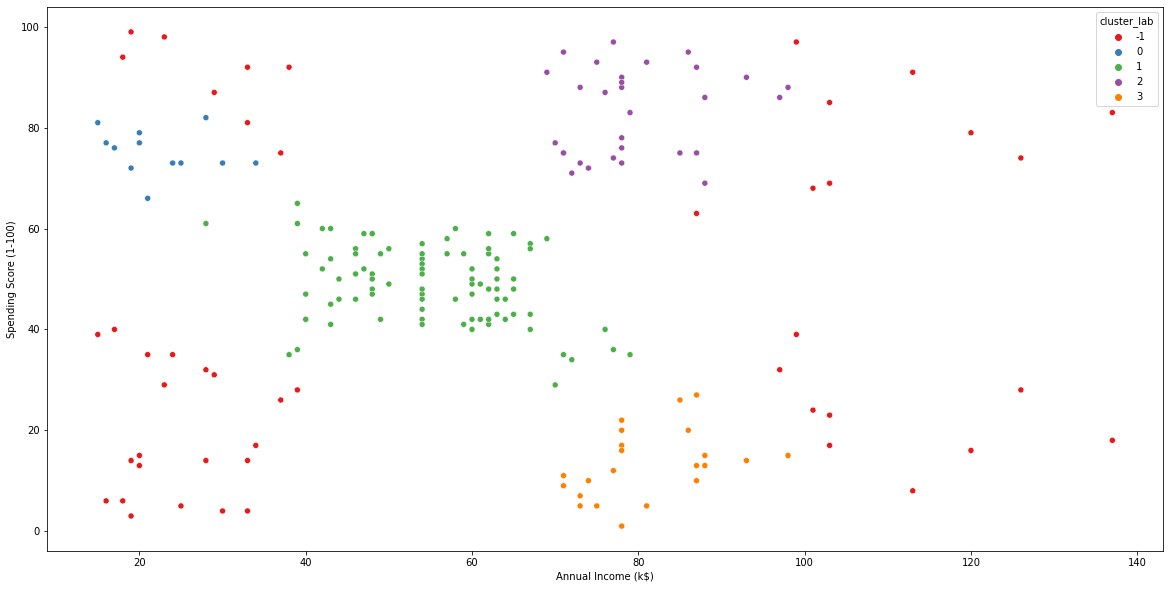

In [37]:
plt.figure(figsize=(20,10))

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster_lab', data = mall_df, palette = 'Set1');

In [38]:
mall_df_scaled.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,0.373443,0.502041
std,0.215285,0.263505
min,0.000000,0.000000
25%,0.217213,0.344388
50%,0.381148,0.500000
75%,0.516393,0.734694
max,1.000000,1.000000


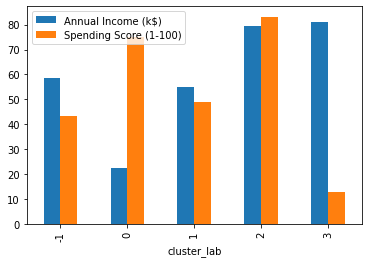

In [40]:
#Profiling the clusters
mall_df.drop(['CustomerID','Age','Genre','cluster_id'],axis=1).groupby('cluster_lab').mean().plot(kind='bar')
plt.show()

In [41]:
#Valuable Customers
mall_df[mall_df['cluster_lab']==2]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
123,124,Male,39,69,91,2,2
125,126,Female,31,70,77,2,2
127,128,Male,40,71,95,2,2
129,130,Male,38,71,75,2,2
131,132,Male,39,71,75,2,2
133,134,Female,31,72,71,2,2
135,136,Female,29,73,88,2,2
137,138,Male,32,73,73,2,2
139,140,Female,35,74,72,2,2
141,142,Male,32,75,93,2,2


In [42]:
#need to market on this cluster to improve the spending score
mall_df[mall_df['cluster_lab']==3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
128,129,Male,59,71,11,3,3
130,131,Male,47,71,9,3,3
134,135,Male,20,73,5,3,3
136,137,Female,44,73,7,3,3
138,139,Male,19,74,10,3,3
140,141,Female,57,75,5,3,3
144,145,Male,25,77,12,3,3
148,149,Female,34,78,22,3,3
150,151,Male,43,78,17,3,3
152,153,Female,44,78,20,3,3


In [43]:
#outliers
mall_df[mall_df['cluster_lab']==1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
27,28,Male,35,28,61,1,1
40,41,Female,65,38,35,0,1
42,43,Male,48,39,36,0,1
43,44,Female,31,39,61,1,1
45,46,Female,24,39,65,1,1
...,...,...,...,...,...,...,...
126,127,Male,43,71,35,3,1
132,133,Female,25,72,34,3,1
142,143,Female,28,76,40,3,1
146,147,Male,48,77,36,3,1


In [44]:
#moderate performers
mall_df[mall_df['cluster_lab']==-1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
0,1,Male,19,15,39,0,-1
2,3,Female,20,16,6,0,-1
4,5,Female,31,17,40,0,-1
6,7,Female,35,18,6,0,-1
7,8,Female,23,18,94,1,-1
8,9,Male,64,19,3,0,-1
10,11,Male,67,19,14,0,-1
11,12,Female,35,19,99,1,-1
12,13,Female,58,20,15,0,-1
14,15,Male,37,20,13,0,-1
